In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
import utils

In [2]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [4]:
zarr_files = utils.find_files(root_dir = '/root/capsule/data', endswith='zarr')

In [5]:
pkl_files = utils.find_files(root_dir = '/root/capsule/data', endswith='.pkl', return_dir=False)

In [6]:
meta_obj = utils.load_pickle_file(pkl_files[0])

In [7]:
meta_obj.loaded_metadata['crop']

False

In [8]:
import zarr
import dask
import dask.array as da
me_store = zarr.DirectoryStore(zarr_files[0])
me_frames = da.from_zarr(me_store, component='data')

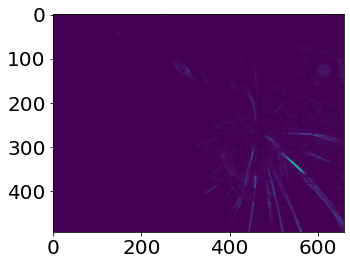

In [9]:
plt.imshow(me_frames[1000])

In [10]:
### Use object
from PCAgenerator import PCAgenerator

In [11]:
me_pca = PCAgenerator(zarr_files[0], pkl_file = pkl_files[0], crop_region=(300, 200, 250, 250))


In [12]:
me_pca._apply_pca_to_motion_energy()

Loaded frames (221611, 492, 658)
Applying crop to me frames (300, 200, 250, 250)


NotImplementedError: 
Dask's reshape only supports operations that merge or split existing dimensions
evenly. For example:

>>> x = da.ones((6, 5, 4), chunks=(3, 2, 2))
>>> x.reshape((3, 2, 5, 4))  # supported, splits 6 into 3 & 2
>>> x.reshape((30, 4))       # supported, merges 6 & 5 into 30
>>> x.reshape((4, 5, 6))     # unsupported, existing dimensions split unevenly

To work around this you may call reshape in multiple passes, or (if your data
is small enough) call ``compute`` first and handle reshaping in ``numpy``
directly.


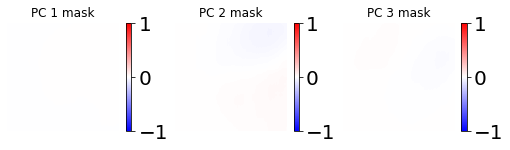

In [14]:

fig = me_pca.plot_spatial_masks()

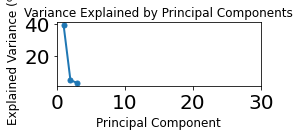

In [23]:
fig = me_pca.plot_explained_variance()